In [1]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy import stats

# Control Variables
show_plots = True

# Import Marketing Campaign Data into a Data Frame
df = pd.read_csv('marketing_data.csv')

# Print Columns of Marketing Data
print(df.columns)

# Print Data Types
print(df.dtypes)

# 1. Print Data for Income and Dt_Customer
income = df['Income']
Dt_Customer = df['Dt_Customer']
print(income, Dt_Customer)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')
ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases    

In [2]:
# 2. Fill in Missing Values if Any
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Income has 24 Missing Entries
# Use Education and Martial Status
# To Calculate an Average Income for Them
# df_filled = df.fillna(df.mean())

# Remove Dollar Sign and Comma from String
income_fix = income.str.replace(r'[$,]+', '', regex=True)

# Convert Income Values from Object to Float
income = income_fix.astype('float')

# Insert FLoat Income into Data Frame
df['Income'] = income
print(df['Income'])

# Extract Entries with No Income Info
empty_entries = df[df['Income'].isnull() == True]
print(empty_entries['Marital_Status'], empty_entries['Education'])

# Options for Marital Status in Missing Income Entries are as Follows:
# Single, Married, Together, and Widow
# Options for Education in Missing Income Entries are as Follows:
# Graduation, Master, PhD, and 2n Cycle

# Method for Replacing Null Income Values
# to Average Incomes Based on Marital
# Status and Education
# Note: index in empty_entries stay the same as df
for index, row in empty_entries.iterrows():
    # print(f"Index: {index}, Marital Status: {row['Marital_Status']}, Education: {row['Education']}")
    avg_value = df.loc[(df['Marital_Status'] == row['Marital_Status']) &
                       (df['Education'] == row['Education'])]['Income'].mean()
    # print(avg_value)
    df.loc[index, 'Income'] = avg_value

# Checking for missing values again
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64
134      Marr

In [3]:
# 3. Find Total Number of Children, Age, and Spending Variables
current_year = date.today().year # 2024
df['total_children'] = df['Kidhome'] + df['Teenhome']
df['age'] = df['Year_Birth'].apply(lambda x: current_year - x)
df['total_spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']
                        + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])


# 3a. Total Purchases Across the 3 Channels
df['total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

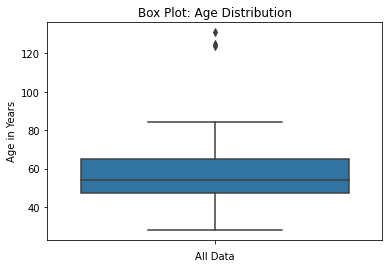

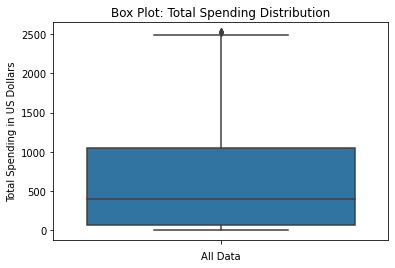

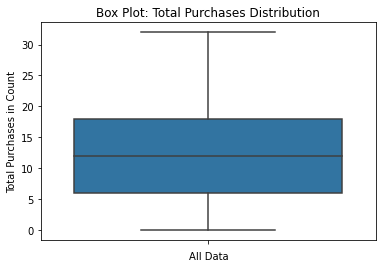

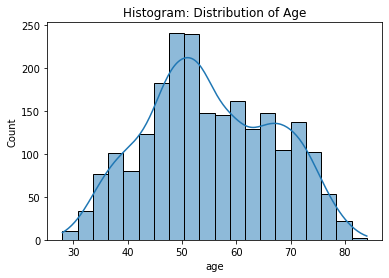

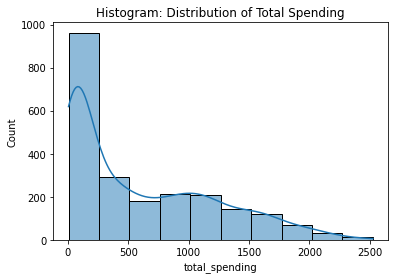

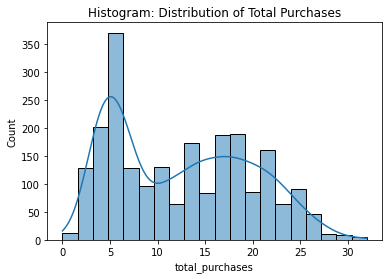

In [4]:
# 4. Generate Box Plots and Histograms

# Total Children Box Plot (Doesn't make too much sense)
# sns.boxplot(y='total_children', data=df)
# plt.title('Box Plot: Total Number of Children Distribution')
# plt.xlabel('All Data')
# plt.ylabel('Total Number of Children')
# plt.show()

# Age Box Plot
sns.boxplot(y='age', data=df)
plt.title('Box Plot: Age Distribution')
plt.xlabel('All Data')
plt.ylabel('Age in Years')
if show_plots:
    plt.show()

# From Box plot, drop outliers due to really old age
df = df[df['age'] <= 85]

# Total Spending Box Plot
sns.boxplot(y='total_spending', data=df)
plt.title('Box Plot: Total Spending Distribution')
plt.xlabel('All Data')
plt.ylabel('Total Spending in US Dollars')
if show_plots:
    plt.show()

# Total Purchases Box Plot
sns.boxplot(y='total_purchases', data=df)
plt.title('Box Plot: Total Purchases Distribution')
plt.xlabel('All Data')
plt.ylabel('Total Purchases in Count')
if show_plots:
    plt.show()

# Histogram of Age
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram: Distribution of Age')
if show_plots:
    plt.show()

# Histogram of Total Spending
sns.histplot(df['total_spending'], bins=10, kde=True)
plt.title('Histogram: Distribution of Total Spending')
if show_plots:
    plt.show()

# Histogram of Total Purchases
sns.histplot(df['total_purchases'], bins=20, kde=True)
plt.title('Histogram: Distribution of Total Purchases')
if show_plots:
    plt.show()

In [5]:
# 5. Apply Ordinal and One-Hot Encoding

# Apply label encoding
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['Education'])

# After label encoding
print("\nDataFrame after label encoding:")
print(df[['Education','education_encoded']].head(30))


DataFrame after label encoding:
     Education  education_encoded
0   Graduation                  2
1   Graduation                  2
2   Graduation                  2
3   Graduation                  2
4   Graduation                  2
5          PhD                  4
6     2n Cycle                  0
7   Graduation                  2
8          PhD                  4
9          PhD                  4
10    2n Cycle                  0
11      Master                  3
12         PhD                  4
13  Graduation                  2
14  Graduation                  2
15  Graduation                  2
16  Graduation                  2
17         PhD                  4
18    2n Cycle                  0
19      Master                  3
20      Master                  3
21      Master                  3
22      Master                  3
23         PhD                  4
24  Graduation                  2
25      Master                  3
26  Graduation                  2
27  Graduation 

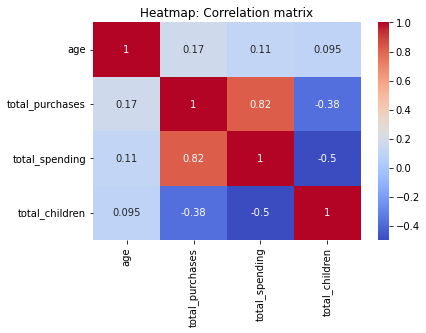

In [6]:
# 6. Heat Map
correlation_matrix = df[['age', 'total_purchases', 'total_spending', 'total_children']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation matrix')
if show_plots:
    plt.show()

In [7]:
# 7. Testing Hypothesis
###
# a. Older people lean towards in-store shopping (chi-square test)

# Make a new features for Chi-Square Test
df['old'] = df['age'] > 50 # Old people are those over 50 years old
df['store'] = df['NumStorePurchases'] > df['NumWebPurchases'] # Prefer shopping in store if store purchases are greater than web purchases

# Create Contingency Table
contingency_table=pd.crosstab(df["old"],df["store"])
print('contingency_table :-\n',contingency_table)

# Observed Values
Observed_Values = contingency_table.values
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
critical_value=chi2.ppf(q=1-alpha,df=ddof)
# P-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
if chi_square_statistic>=critical_value:
    print("Reject H_0, Older individuals prefer traditional in-store shopping")
else:
    print("Retain H_0, Older individuals do not prefer traditional in-store shopping")

if p_value<=alpha:
    print("Reject H_0, Older individuals prefer traditional in-store shopping")
else:
    print("Retain H_0, Older individuals do not prefer traditional in-store shopping")
###

###
# b. People with children lean towards online shopping (chi-square test)

# Make a new features for Chi-Square Test
df['children'] = df['Kidhome'] > 0 # People with children
df['online'] = df['NumStorePurchases'] < df['NumWebPurchases'] # Prefer shopping online if store purchases are less than web purchases

# Create Contingency Table
contingency_table=pd.crosstab(df["children"],df["online"])
print('contingency_table :-\n',contingency_table)

# Observed Values
Observed_Values = contingency_table.values
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
critical_value=chi2.ppf(q=1-alpha,df=ddof)
# P-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
if chi_square_statistic>=critical_value:
    print("Reject H_0, People with children prefer online shopping")
else:
    print("Retain H_0, People with children do not prefer online shopping")

if p_value<=alpha:
    print("Reject H_0, People with children prefer online shopping")
else:
    print("Retain H_0, People with children do not prefer online shopping")
###

###
# c. Sales at physical stores may face risk by alternate distribution channels (t-test)

# Make new features for T-test
# True = prefer physical
# False = prefer other
df['physical'] = (df['NumStorePurchases'] > df['NumWebPurchases']) & (df['NumStorePurchases'] > df['NumCatalogPurchases'])

prefer_physical = df[df['physical'] == True]['total_purchases']
prefer_other = df[df['physical'] == False]['total_purchases']

# Perform the independent two-sample t-test
t_stat, p_val = stats.ttest_ind(prefer_physical, prefer_other, equal_var=False)
print("P-Value: ",p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis - physical stores at risk of cannibalization by alternative distribution")
else:
    print("Fail to reject the null hypothesis - physical stores not at risk of cannibalization by alternative distribution")

# d. Does the United States significantly outperform the rest of the world in total purchase volumes?

us_data = df[df['Country'] == 'US']['total_purchases']
other_data = df[df['physical'] != 'US']['total_purchases']

# Perform the independent two-sample t-test
t_stat, p_val = stats.ttest_ind(us_data, other_data, equal_var=False)
print("P-Value: ",p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The United States significantly outperforms the rest of the world in total purchase volumes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in total purchase volumes between the United States and the rest of the world.")

contingency_table :-
 store  False  True 
old                
False    229    618
True     446    944
p-value: 0.011608816365114016
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 6.369654987177731
critical_value: 3.841458820694124
Reject H_0, Older individuals prefer traditional in-store shopping
Reject H_0, Older individuals prefer traditional in-store shopping
contingency_table :-
 online    False  True 
children              
False      1059    232
True        808    138
p-value: 0.03338711754967438
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4.525817670669883
critical_value: 3.841458820694124
Reject H_0, People with children prefer online shopping
Reject H_0, People with children prefer online shopping
P-Value:  1.948111592780264e-13
Reject the null hypothesis - physical stores at risk of cannibalization by alternative distribution
P-Value:  0.16759685484730377
Fail to reject the null hypothesis: There is no significant difference in

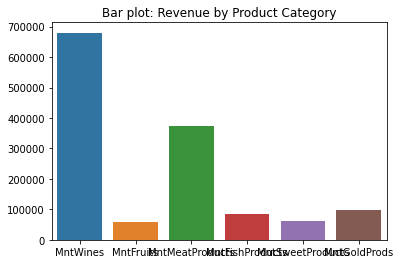

From the Bar Plot, Wines sold the most while Fruits sold the least


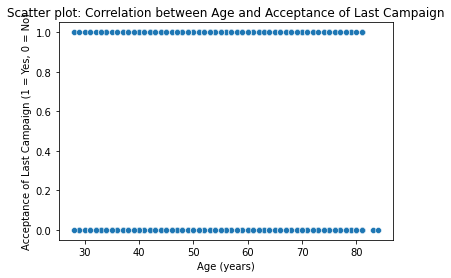

From the Scatter PLot, there is no correlation between age and acceptance of the last campaign


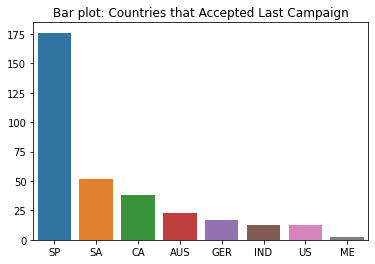

From the Bar Plot, Spain has the highest number of customers that accepted the last campaign


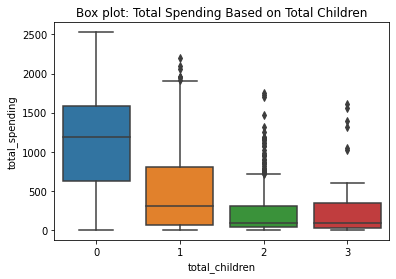

From the Box Plot, customers with no children spent the most while those with children spent less money


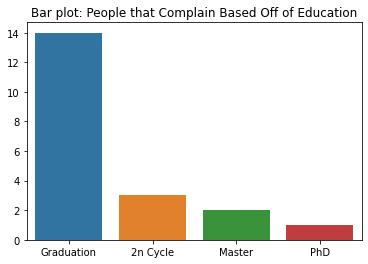

From the Bar Plot, Customers with just a graduation background complained the most while higher degree customer complained the least


In [8]:
# 8. Visual Analyzation

# a. Identify top performing product and ones with lowest revenue

products = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds'
]

# Calculate total revenue for each product category
revenue = df[products].sum()
# print(revenue)

# Bar Plot
sns.barplot(x=revenue.index, y=revenue.values)
plt.title('Bar plot: Revenue by Product Category')
if show_plots:
    plt.show()

print('From the Bar Plot, Wines sold the most while Fruits sold the least')

# b. Correlation between age and accepting last campaign

# Scatter Plot
sns.scatterplot(x='age', y='Response', data=df)
plt.title('Scatter plot: Correlation between Age and Acceptance of Last Campaign')
plt.ylabel('Acceptance of Last Campaign (1 = Yes, 0 = No)')
plt.xlabel('Age (years)')
if show_plots:
    plt.show()

print('From the Scatter PLot, there is no correlation between age and acceptance of the last campaign')

# c. Country with highest number of customers that accepted the last campaign

# Calculate campaign data based off Country
campaign_data = df[df['Response'] == 1]['Country'].value_counts()

# Bar Plot
sns.barplot(x=campaign_data.index, y=campaign_data.values)
plt.title('Bar plot: Countries that Accepted Last Campaign')
if show_plots:
    plt.show()

print('From the Bar Plot, Spain has the highest number of customers that accepted the last campaign')

# d. Pattern between number of children and total expenditure

# Box Plot
sns.boxplot(x='total_children', y='total_spending', data=df)
plt.title('Box plot: Total Spending Based on Total Children')
if show_plots:
    plt.show()

print('From the Box Plot, customers with no children spent the most while those with children spent less money')

# e. Educational Background vs Complaints

# Calculate campaign data based off Country
complain_data = df[df['Complain'] == 1]['Education'].value_counts()

# Bar Plot
sns.barplot(x=complain_data.index, y=complain_data.values)
plt.title('Bar plot: People that Complain Based Off of Education')
if show_plots:
    plt.show()

print('From the Bar Plot, Customers with just a graduation background complained the most while higher degree customer complained the least')